# Etapas:
1.   **Conversão de Dicom (.dcm) para .jpg**
2.   **Extração de Características:**
        *   dataset_raiox_features_adjusted.csv
            *   **FEATURE1** = Histograma de Cor
            *   **FEATURE2** = Haralick
            *   **FEATURE3** = LBP
            *   **FEATURE4** = Zernike
            *   **FEATURE5** = Combinação HUmoment **+** Haralick **+** Histograma de Cor
        *   dataset_texture_features_raiox.csv
            *   **FEATURE1** = FOS
            *   **FEATURE2** = GLCM
            *   **FEATURE3** = GLDS
            *   **FEATURE4** = NGTDM
            *   **FEATURE5** = SFM
            *   **FEATURE6** = LTE
            *   **FEATURE7** = FPS
            *   **FEATURE8** = LBP
            *   **FEATURE9** = LPQ
            *   **FEATURE10** = HUMoments
            *   **FEATURE11** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS
            *   **FEATURE12** = FOS + GLCM + GLDS + NGTDM + SFM + LTE + FPS + LBP + LPQ + HUMoments
3.   **Descrição dos dados:**
    *   190 imagens de COVID
    *   310 imagens INTERSTICIAIS-NÃO-COVID
    *   381 imagens NORMAIS

4.   **Formato do CSV:**

|Índice|Imagem|Feature1|Feature2|Feature3|...|FeatureN|Category|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|0|1.jpg|list [...]|list [...]|list [...]|...|list [...]|Class|

5.   **Dimensionalidade dos dados:**

*  dataset_raiox_features_adjusted.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|
|:--:|:--:|:--:|:--:|:--:|
|512|13|108|36|536|

*  dataset_texture_features_raiox.csv

|Feature1|Feature2|Feature3|Feature4|Feature5|Feature6|Feature7|Feature8|Feature9|Feature10|Feature11|Feature12|
|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|
|16|28|5|5|4|6|2|59|256|11|66|381|

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Retorna os dados extraidos em formato de lista
def split_data(input, feature_name, size):
    image_ids = []
    image_features = []
    image_categories = []
    for i in range(size):
        x = [ float(v) for v in input.iloc[i][feature_name][1:-1].split(", ") ]
        x = np.array(x)
        image_features.append(x)
        image_ids.append(input.iloc[i].Image)
        image_categories.append(input.iloc[i].Category)
    return image_ids, image_features, image_categories

In [84]:
#Leitura do Dataset
#input = pd.read_csv("dataset_raiox_features_initial.csv") #First Test
#input = pd.read_csv("dataset_raiox_features_adjusted.csv") #Second Test
input = pd.read_csv("dataset_texture_features_raiox.csv") #Third Test

#Classes no dataset
print("\nDataset completo:")
print(input["Category"].value_counts())

#Obtendo os indices da classe a ser removida: intersticiais-nao-covid
idx = input.index[input['Category'] == "intersticiais-nao-covid"]

#Removendo instancias
input.drop(idx, inplace=True)

print("\nDataset com 2 classes:")
print(input["Category"].value_counts())


Dataset completo:
normais                    381
intersticiais-nao-covid    310
covid                      199
Name: Category, dtype: int64

Dataset com 2 classes:
normais    381
covid      199
Name: Category, dtype: int64


In [85]:
#Atualizando indices (Removendo os 'furos' dos drops)
input = input.reset_index()
input = input.drop('index', axis=1)
input

,Image,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Category
0,1.jpg,"[160.4164347732578, 3395.160133328635, 175.0, ...","[0.000695140368883574, 24.23286958665707, 0.99...","[295519.25739254977, 23424991.0, 130550154765....","[41.089522344890426, 0.40077554472211935, 4.96...","[19.257765935527225, 7.087545475311303, 0.4548...","[923.9429241516812, 6.260450905711381, 10.1884...","[164475.5018814408, 39895.64426194065]","[259736.0, 529704.0, 201207.0]","[0.003790622755384268, 0.002918064309805248, 0...","[0.0009468202787340657, 7.270535577704936e-10,...","[160.4164347732578, 3395.160133328635, 175.0, ...","[160.4164347732578, 3395.160133328635, 175.0, ...",covid
1,10.jpg,"[148.0706611764706, 3437.2599391598555, 152.0,...","[0.0014280483234884469, 23.59772280100738, 0.9...","[638634.7744921264, 32744585.5, 409858658515.0...","[95.17143294293629, 0.20379755138055672, 2.833...","[38.64849517494062, 8.12803593706548, 0.420112...","[931.0585197111739, 5.815125774834571, 8.01404...","[171238.40212515026, 53894.02792038732]","[384567.0, 691531.0, 203902.0]","[0.003336249755210077, 0.002759808969102774, 0...","[0.000982226586706747, 3.744623899294705e-08, ...","[148.0706611764706, 3437.2599391598555, 152.0,...","[148.0706611764706, 3437.2599391598555, 152.0,...",covid
2,100.jpg,"[134.34679529411767, 3093.117547164368, 147.0,...","[0.0012642856172707575, 19.044094949979076, 0....","[605113.5425850655, 24698798.0, 385622360144.0...","[72.70567656297798, 0.19356719118361723, 3.473...","[35.42016062722625, 7.200156029837356, 0.44604...","[882.7269944516568, 5.126092787106667, 7.62205...","[158290.76183625372, 42544.87722368541]","[345771.0, 736774.0, 197455.0]","[0.0034918098029678014, 0.0028032394392889406,...","[0.0010824582113407174, 2.030679613549742e-08,...","[134.34679529411767, 3093.117547164368, 147.0,...","[134.34679529411767, 3093.117547164368, 147.0,...",covid
3,101.jpg,"[103.18471686274509, 1606.855626323931, 105.0,...","[0.0007528181115100378, 20.371955509146055, 0....","[436095.55713687517, 29988149.75, 264373871510...","[45.718561378813625, 0.12971125835212588, 7.00...","[27.969063310471437, 7.163711844002238, 0.3158...","[634.7272735055308, 6.045833128998495, 11.7602...","[120038.40994116386, 34078.13945890994]","[402959.0, 589104.0, 287937.0]","[0.003829777825507426, 0.0032920296401114345, ...","[0.0013799682773542718, 4.970464365550192e-08,...","[103.18471686274509, 1606.855626323931, 105.0,...","[103.18471686274509, 1606.855626323931, 105.0,...",covid
4,102.jpg,"[155.6513905882353, 1849.2937200743079, 154.0,...","[0.0006261165238808976, 20.296652162843017, 0....","[413120.0877246579, 26900167.5, 255811113640.5...","[48.90817292584593, 0.14838047228659348, 4.814...","[26.074476190180754, 7.493446819358741, 0.3325...","[678.7995659692539, 5.882724209321972, 11.8584...","[177020.8915122781, 42310.683335004345]","[400202.0, 575652.0, 304146.0]","[0.005247190443401412, 0.002684792702417577, 0...","[0.001035648791604888, 4.49447318325559e-08, 1...","[155.6513905882353, 1849.2937200743079, 154.0,...","[155.6513905882353, 1849.2937200743079, 154.0,...",covid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,95.jpg,"[170.03240220946947, 2809.3158533297874, 186.0...","[0.000972897209059058, 23.705616507150268, 0.9...","[300782.65695278, 19686512.75, 130800514240.75...","[37.71813661541208, 0.317772339541998, 4.71930...","[19.96943046934301, 6.982063551054795, 0.50020...","[839.5652407397488, 5.751986079988834, 7.43182...","[166373.2412598494, 37755.681337424896]","[241275.0, 498109.0, 185086.0]","[0.0037306893560343844, 0.002795278695419774, ...","[0.0009340938663508741, 3.1579696160947395e-10...","[170.03240220946947, 2809.3158533297874, 186.0...","[170.03240220946947, 2809.3158533297874, 186.0...",normais
576,96.jpg,"[109.82818784328352, 3118.4184604780476, 116.0...","[0.0005337353312743764, 16.547563598590774, 0....","[789220.8231396521, 34396152.0, 

In [86]:
#Definindo as features e as funcoes de distancia
feature_names = [f for f in input.columns[1:-1]]
feature_names = ['Feature1','Feature2', 'Feature9']
distance_functions = ["euclidean", "cosine", "manhattan"]
seed = 42 #Semente de entrada para execucao das Tecnicas de Projecao Multidimensional
distance_matrix_output = True #Ativa/Desativa a geracao dos arquivos contendo matrizes de dissimilaridade

#Numero de instancias do dataset
size = input.shape[0]
print(size)

#Obtendo as features
image_ids = {}; image_features = {}; image_categories  = {};
for feature_name in feature_names:
    ids, features, categories = split_data(input, feature_name, size)
    image_ids[feature_name] = ids
    image_features[feature_name] = features
    image_categories[feature_name] = categories

580


In [87]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances

#Example: http://techflare.blog/3-ways-to-do-dimensionality-reduction-techniques-in-scikit-learn/

#Gerando a matriz de distancias para todas as funcoes definidas em "distance_functions"
tsne_coord = {}; mds_coord = {}; pca_coord = {}; exec = 1;
for distance_function in distance_functions:
    for feature_name in feature_names:
        X = image_features[feature_name]
        X_normalized = StandardScaler().fit(X).transform(X)
        info = pairwise_distances(X_normalized, Y=None, metric=distance_function) #Distance Matrix

        #Gerando as matrizes de dissimilaridade (distancia)
        if distance_matrix_output == True:
            output = pd.DataFrame(info)
            output["Image"]    = image_ids[feature_name]
            output["Category"] = image_categories[feature_name]
            output_name =  str(exec) + "-" + distance_function + "_" + feature_name + ".csv"
            output.to_csv(output_name, index=False)  

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
        print("(" + str(exec) + ") Executando t-SNE: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_tsne = TSNE(n_components=2, perplexity=1.8, metric="precomputed", random_state=seed).fit_transform(info)
        proj_tsne = pd.DataFrame(matrix_2d_tsne)
        proj_tsne.columns = ["x", "y"]
        proj_tsne["Image"]    = image_ids[feature_name]
        proj_tsne["Category"] = image_categories[feature_name]
        tsne_coord[distance_function + " - " + feature_name] = proj_tsne

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
        print("(" + str(exec) + ") Executando MDS: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_mds = MDS(n_components=2, dissimilarity='precomputed', random_state=seed).fit_transform(info)
        proj_mds = pd.DataFrame(matrix_2d_mds)
        proj_mds.columns = ["x", "y"]
        proj_mds["Image"]    = image_ids[feature_name]
        proj_mds["Category"] = image_categories[feature_name]
        mds_coord[distance_function + " - " + feature_name] = proj_mds

        #Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
        print("(" + str(exec) + ") Executando PCA: distance_function=" + distance_function + ", feature=" + feature_name)
        matrix_2d_pca = PCA(n_components=2, random_state=seed).fit_transform(info)
        proj_pca = pd.DataFrame(matrix_2d_pca)
        proj_pca.columns = ["x", "y"]
        proj_pca["Image"]    = image_ids[feature_name]
        proj_pca["Category"] = image_categories[feature_name]
        pca_coord[distance_function + " - " + feature_name] = proj_pca

        exec += 1


(1) Executando t-SNE: distance_function=euclidean, feature=Feature1


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(1) Executando MDS: distance_function=euclidean, feature=Feature1
(1) Executando PCA: distance_function=euclidean, feature=Feature1
(2) Executando t-SNE: distance_function=euclidean, feature=Feature2


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(2) Executando MDS: distance_function=euclidean, feature=Feature2
(2) Executando PCA: distance_function=euclidean, feature=Feature2
(3) Executando t-SNE: distance_function=euclidean, feature=Feature9


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(3) Executando MDS: distance_function=euclidean, feature=Feature9
(3) Executando PCA: distance_function=euclidean, feature=Feature9
(4) Executando t-SNE: distance_function=cosine, feature=Feature1


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(4) Executando MDS: distance_function=cosine, feature=Feature1
(4) Executando PCA: distance_function=cosine, feature=Feature1
(5) Executando t-SNE: distance_function=cosine, feature=Feature2


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(5) Executando MDS: distance_function=cosine, feature=Feature2
(5) Executando PCA: distance_function=cosine, feature=Feature2
(6) Executando t-SNE: distance_function=cosine, feature=Feature9


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(6) Executando MDS: distance_function=cosine, feature=Feature9
(6) Executando PCA: distance_function=cosine, feature=Feature9
(7) Executando t-SNE: distance_function=manhattan, feature=Feature1


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(7) Executando MDS: distance_function=manhattan, feature=Feature1
(7) Executando PCA: distance_function=manhattan, feature=Feature1
(8) Executando t-SNE: distance_function=manhattan, feature=Feature2


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(8) Executando MDS: distance_function=manhattan, feature=Feature2
(8) Executando PCA: distance_function=manhattan, feature=Feature2
(9) Executando t-SNE: distance_function=manhattan, feature=Feature9


C:\Users\junin\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


(9) Executando MDS: distance_function=manhattan, feature=Feature9
(9) Executando PCA: distance_function=manhattan, feature=Feature9


In [88]:
#Cria o Scatterplot para todas as variacoes da tecnica de reducao de dimensionalidade desejada
def projection(proj_data, technique, distance_functions, feature_names):
    #Definindo o tamanho das figuras
    rows = len(distance_functions)
    cols = len(feature_names)
    height = 4*rows
    width  = 4*cols

    fig, axs = plt.subplots(rows, cols, figsize=(width, height))
    fig.subplots_adjust(
        left   = 0.1, # the left side of the subplots of the figure
        right  = 0.9,   # the right side of the subplots of the figure
        bottom = 0.1,   # the bottom of the subplots of the figure
        top    = 0.9,   # the top of the subplots of the figure
        wspace = 0.4,   # the amount of width reserved for blank space between subplots
        hspace = 0.6    # the amount of height reserved for white space between subplots
    )

    r=0
    for distance_function in distance_functions:
        c=0
        for feature_name in feature_names:
            sns.scatterplot(data=proj_data[distance_function + " - " + feature_name], x="x", y="y", hue="Category", ax=axs[r,c])
            axs[r,c].legend(loc="lower center", bbox_to_anchor=(0.5, -0.50))
            axs[r,c].set_title(technique + " - " + distance_function + " - " + feature_name)
            c+=1
        r+=1

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import MinMaxScaler

"""
Funcao para classificacao do conjunto de dados passado
    inputs:     Variáveis de entrada (X)
    targets:    Variáveis alvo (y)
"""
def model_tester(inputs, targets, weights=None):
  results = {} #Armazena os resultados obtidos
  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(targets, pd.core.frame.DataFrame) or isinstance(targets, pd.core.series.Series):
    targets = targets.values
  
  testes = {
    "Nearest Neighbors" :  KNeighborsClassifier(3),
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights),
    "Random Forest" : RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    "Neural Net" : MLPClassifier(alpha=1, max_iter=1000),
    "AdaBoost" : AdaBoostClassifier(),
    "Naive Bayes" : GaussianNB()
  }

  for teste in testes:
    clf = testes[teste]
    scores = []    
    
    skfold = StratifiedKFold(n_splits=10)
    for train_index, test_index in skfold.split(inputs, targets):
      X_train, X_test = inputs[train_index], inputs[test_index]
      y_train, y_test = targets[train_index], targets[test_index]
      
      # Normalizing the data.
      scaler = MinMaxScaler().fit(X_train)
      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test)
      
      # Fitting and predictions.
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      scores.append(balanced_accuracy_score(y_test, y_pred))
    avg_score = np.mean(scores)*100
    results[teste] = avg_score
    print("----Score do classificador '%s': %.2f" % (teste, avg_score))
    
  return results

In [90]:
#Definindo um grafico de barras personalizado
def bar_chart(classifiers, scores, title, x_label, y_label, size, further_info=""):
  fig, ax = plt.subplots(figsize = size)
  plt.grid(b=bool, which='both', axis='y', color='r', linestyle='-', linewidth=0.1)
  ind = np.arange(len(classifiers))    # the x locations for the groups
  width = 0.8                          # the width of the bars
  rects = ax.bar(ind, scores, width, bottom=0, color='r', edgecolor='k') #yerr=std Desvio Padrao
  ax.set_title(title + further_info)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  ax.set_xticks(ind)
  ax.set_xticklabels( classifiers,
                      rotation=40,
                      horizontalalignment='right')
  
  #Definindo as legendas acima de cada caixa do histograma
  #Attach a text label above each bar in *rects*, displaying its height.
  for rect in rects:
      height = rect.get_height()
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  #rotation=90,
                  ha='center',
                  va='bottom')

  #Definindo os limites da imagem
  bottom, top = plt.ylim()         # return the current ylim
  #plt.ylim((bottom, top + 3.5))   # set the ylim to bottom, top
  plt.ylim((bottom, 100 + 5.5))          # set the ylim to bottom, top

  ax.autoscale_view()
  plt.tight_layout()
    
  #Exportando a figura
  fig_name = title + further_info + '.png'
  plt.savefig(fig_name)

  plt.show()

In [114]:
tsne_results = []
list_df = []
#Armazena os resultados da classificacao para cada Feature
for descriptor in tsne_coord.keys():

    feature_name_l =[]
    distancia_name_l = []
    t =pd.DataFrame()
    
    print("\nExecutando classificadores: descriptor=" + descriptor)
    X = pd.DataFrame(tsne_coord[descriptor][ ['x', 'y'] ])
    target_classes = [x for x in tsne_coord[descriptor]['Category'].unique()]
    y = tsne_coord[descriptor]['Category'].factorize(target_classes)[0]
    result = model_tester(X, y)
    tsne_results.append(result)
    print(descriptor)
    #print(tsne_results[0])
    print(result)
    
    
    t = pd.DataFrame(result.items(), columns=['Algortimo', 'Acuracia'])
    
    distancia_name,nenhum, feature_name = descriptor.split()
    feature_name_l = [feature_name] * 8
    distancia_name_l = [distancia_name] * 8

    t['distancia'] = distancia_name_l
    t['feature'] = feature_name_l
    t['proj'] = ["tsne"] * 8
    
    list_df.append(t)
    print("***************************")
    print(list_df)
   
    
  
    



Executando classificadores: descriptor=euclidean - Feature1
----Score do classificador 'Nearest Neighbors': 81.84
----Score do classificador 'SVM Linear': 50.00
----Score do classificador 'SVM Polinomial grau 3': 50.00
----Score do classificador 'Decision Tree (gini)': 81.46
----Score do classificador 'Random Forest': 68.09
----Score do classificador 'Neural Net': 50.00
----Score do classificador 'AdaBoost': 61.56
----Score do classificador 'Naive Bayes': 51.82
euclidean - Feature1
{'Nearest Neighbors': 81.83906882591094, 'SVM Linear': 50.0, 'SVM Polinomial grau 3': 50.0, 'Decision Tree (gini)': 81.4574898785425, 'Random Forest': 68.0921052631579, 'Neural Net': 50.0, 'AdaBoost': 61.556342780026995, 'Naive Bayes': 51.819163292847506}
***************************
[               Algortimo   Acuracia  distancia   feature  proj
0      Nearest Neighbors  81.839069  euclidean  Feature1  tsne
1             SVM Linear  50.000000  euclidean  Feature1  tsne
2  SVM Polinomial grau 3  50.000000  e

----Score do classificador 'SVM Polinomial grau 3': 50.00
----Score do classificador 'Decision Tree (gini)': 86.20
----Score do classificador 'Random Forest': 85.74
----Score do classificador 'Neural Net': 69.40
----Score do classificador 'AdaBoost': 76.35
----Score do classificador 'Naive Bayes': 68.21
cosine - Feature2
{'Nearest Neighbors': 89.28981106612687, 'SVM Linear': 69.96761133603238, 'SVM Polinomial grau 3': 50.0, 'Decision Tree (gini)': 86.19770580296897, 'Random Forest': 85.73717948717949, 'Neural Net': 69.39507422402158, 'AdaBoost': 76.3491902834008, 'Naive Bayes': 68.21423751686909}
***************************
[               Algortimo   Acuracia  distancia   feature  proj
0      Nearest Neighbors  81.839069  euclidean  Feature1  tsne
1             SVM Linear  50.000000  euclidean  Feature1  tsne
2  SVM Polinomial grau 3  50.000000  euclidean  Feature1  tsne
3   Decision Tree (gini)  81.457490  euclidean  Feature1  tsne
4          Random Forest  68.092105  euclidean  Feat

----Score do classificador 'SVM Polinomial grau 3': 81.04
----Score do classificador 'Decision Tree (gini)': 85.30
----Score do classificador 'Random Forest': 88.48
----Score do classificador 'Neural Net': 85.57
----Score do classificador 'AdaBoost': 85.55
----Score do classificador 'Naive Bayes': 84.53
manhattan - Feature2
{'Nearest Neighbors': 89.53643724696356, 'SVM Linear': 85.78002699055331, 'SVM Polinomial grau 3': 81.03981106612686, 'Decision Tree (gini)': 85.3029689608637, 'Random Forest': 88.48380566801619, 'Neural Net': 85.56950067476382, 'AdaBoost': 85.54655870445345, 'Naive Bayes': 84.53340080971661}
***************************
[               Algortimo   Acuracia  distancia   feature  proj
0      Nearest Neighbors  81.839069  euclidean  Feature1  tsne
1             SVM Linear  50.000000  euclidean  Feature1  tsne
2  SVM Polinomial grau 3  50.000000  euclidean  Feature1  tsne
3   Decision Tree (gini)  81.457490  euclidean  Feature1  tsne
4          Random Forest  68.092105 

In [115]:
list_df

[               Algortimo   Acuracia  distancia   feature  proj
 0      Nearest Neighbors  81.839069  euclidean  Feature1  tsne
 1             SVM Linear  50.000000  euclidean  Feature1  tsne
 2  SVM Polinomial grau 3  50.000000  euclidean  Feature1  tsne
 3   Decision Tree (gini)  81.457490  euclidean  Feature1  tsne
 4          Random Forest  68.092105  euclidean  Feature1  tsne
 5             Neural Net  50.000000  euclidean  Feature1  tsne
 6               AdaBoost  61.556343  euclidean  Feature1  tsne
 7            Naive Bayes  51.819163  euclidean  Feature1  tsne,
                Algortimo   Acuracia  distancia   feature  proj
 0      Nearest Neighbors  90.049595  euclidean  Feature2  tsne
 1             SVM Linear  74.155196  euclidean  Feature2  tsne
 2  SVM Polinomial grau 3  80.516869  euclidean  Feature2  tsne
 3   Decision Tree (gini)  85.339069  euclidean  Feature2  tsne
 4          Random Forest  89.039811  euclidean  Feature2  tsne
 5             Neural Net  75.023617  e

In [116]:
merge = pd.concat(list_df)

In [117]:
merge

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,81.839069,euclidean,Feature1,tsne
1,SVM Linear,50.000000,euclidean,Feature1,tsne
2,SVM Polinomial grau 3,50.000000,euclidean,Feature1,tsne
3,Decision Tree (gini),81.457490,euclidean,Feature1,tsne
4,Random Forest,68.092105,euclidean,Feature1,tsne
...,...,...,...,...,...
3,Decision Tree (gini),79.148448,manhattan,Feature9,tsne
4,Random Forest,73.711201,manhattan,Feature9,tsne
5,Neural Net,55.075911,manhattan,Feature9,tsne
6,AdaBoost,69.063090,manhattan,Feature9,tsne


In [118]:
string = 'cosine - Feature2'
nome,idade,profissao = string.split()

In [119]:
pca_results = []
list_df = []
#Armazena os resultados da classificacao para cada Feature
for descriptor in pca_coord.keys():
    feature_name_l =[]
    distancia_name_l = []
    
    print("\nExecutando classificadores: descriptor=" + descriptor)
    X = pd.DataFrame(pca_coord[descriptor][ ['x', 'y'] ])
    target_classes = [x for x in pca_coord[descriptor]['Category'].unique()]
    y = pca_coord[descriptor]['Category'].factorize(target_classes)[0]
    result = model_tester(X, y)
    pca_results.append(result)
    print(descriptor)
    print(type(pca_results[0]))
    
    t = pd.DataFrame(result.items(), columns=['Algortimo', 'Acuracia'])
    
    distancia_name,nenhum, feature_name = descriptor.split()
    feature_name_l = [feature_name] * 8
    distancia_name_l = [distancia_name] * 8

    t['distancia'] = distancia_name_l
    t['feature'] = feature_name_l
    t['proj'] = ['pca'] * 8
    
    list_df.append(t)


Executando classificadores: descriptor=euclidean - Feature1
----Score do classificador 'Nearest Neighbors': 70.35
----Score do classificador 'SVM Linear': 55.33
----Score do classificador 'SVM Polinomial grau 3': 55.19
----Score do classificador 'Decision Tree (gini)': 66.72
----Score do classificador 'Random Forest': 73.98
----Score do classificador 'Neural Net': 56.73
----Score do classificador 'AdaBoost': 72.28
----Score do classificador 'Naive Bayes': 60.20
euclidean - Feature1
<class 'dict'>

Executando classificadores: descriptor=euclidean - Feature2
----Score do classificador 'Nearest Neighbors': 83.84
----Score do classificador 'SVM Linear': 86.65
----Score do classificador 'SVM Polinomial grau 3': 87.43
----Score do classificador 'Decision Tree (gini)': 80.33
----Score do classificador 'Random Forest': 85.94
----Score do classificador 'Neural Net': 85.44
----Score do classificador 'AdaBoost': 84.60
----Score do classificador 'Naive Bayes': 86.17
euclidean - Feature2
<class 'd

In [122]:
merge2 = pd.concat(list_df)

In [123]:
merge2

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,70.345816,euclidean,Feature1,pca
1,SVM Linear,55.332321,euclidean,Feature1,pca
2,SVM Polinomial grau 3,55.187584,euclidean,Feature1,pca
3,Decision Tree (gini),66.717949,euclidean,Feature1,pca
4,Random Forest,73.983806,euclidean,Feature1,pca
...,...,...,...,...,...
3,Decision Tree (gini),68.901822,manhattan,Feature9,pca
4,Random Forest,73.635290,manhattan,Feature9,pca
5,Neural Net,68.474022,manhattan,Feature9,pca
6,AdaBoost,72.066127,manhattan,Feature9,pca


In [124]:
mds_results = []
list_df = []
#Armazena os resultados da classificacao para cada Feature
for descriptor in mds_coord.keys():
    feature_name_l =[]
    distancia_name_l = []
    
    print("\nExecutando classificadores: descriptor=" + descriptor)
    X = pd.DataFrame(mds_coord[descriptor][ ['x', 'y'] ])
    target_classes = [x for x in mds_coord[descriptor]['Category'].unique()]
    y = mds_coord[descriptor]['Category'].factorize(target_classes)[0]
    result = model_tester(X, y)
    mds_results.append(result)
    print(descriptor)
    print(type(mds_results[0]))
    
    t = pd.DataFrame(result.items(), columns=['Algortimo', 'Acuracia'])
    
    distancia_name,nenhum, feature_name = descriptor.split()
    feature_name_l = [feature_name] * 8
    distancia_name_l = [distancia_name] * 8

    t['distancia'] = distancia_name_l
    t['feature'] = feature_name_l
    t['proj'] = ['mds'] * 8
    
    list_df.append(t)


Executando classificadores: descriptor=euclidean - Feature1
----Score do classificador 'Nearest Neighbors': 85.15
----Score do classificador 'SVM Linear': 73.22
----Score do classificador 'SVM Polinomial grau 3': 81.83
----Score do classificador 'Decision Tree (gini)': 79.98
----Score do classificador 'Random Forest': 85.16
----Score do classificador 'Neural Net': 75.96
----Score do classificador 'AdaBoost': 81.67
----Score do classificador 'Naive Bayes': 71.95
euclidean - Feature1
<class 'dict'>

Executando classificadores: descriptor=euclidean - Feature2
----Score do classificador 'Nearest Neighbors': 88.12
----Score do classificador 'SVM Linear': 88.12
----Score do classificador 'SVM Polinomial grau 3': 88.87
----Score do classificador 'Decision Tree (gini)': 83.59
----Score do classificador 'Random Forest': 88.47
----Score do classificador 'Neural Net': 87.75
----Score do classificador 'AdaBoost': 87.08
----Score do classificador 'Naive Bayes': 89.26
euclidean - Feature2
<class 'd

In [125]:
merge3 = pd.concat(list_df)

In [126]:
merge3

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,85.145074,euclidean,Feature1,mds
1,SVM Linear,73.220648,euclidean,Feature1,mds
2,SVM Polinomial grau 3,81.829285,euclidean,Feature1,mds
3,Decision Tree (gini),79.980769,euclidean,Feature1,mds
4,Random Forest,85.158232,euclidean,Feature1,mds
...,...,...,...,...,...
3,Decision Tree (gini),70.902159,manhattan,Feature9,mds
4,Random Forest,79.095816,manhattan,Feature9,mds
5,Neural Net,68.102227,manhattan,Feature9,mds
6,AdaBoost,77.951080,manhattan,Feature9,mds


In [127]:
merge

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,81.839069,euclidean,Feature1,tsne
1,SVM Linear,50.000000,euclidean,Feature1,tsne
2,SVM Polinomial grau 3,50.000000,euclidean,Feature1,tsne
3,Decision Tree (gini),81.457490,euclidean,Feature1,tsne
4,Random Forest,68.092105,euclidean,Feature1,tsne
...,...,...,...,...,...
3,Decision Tree (gini),79.148448,manhattan,Feature9,tsne
4,Random Forest,73.711201,manhattan,Feature9,tsne
5,Neural Net,55.075911,manhattan,Feature9,tsne
6,AdaBoost,69.063090,manhattan,Feature9,tsne


In [128]:
merge2

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,70.345816,euclidean,Feature1,pca
1,SVM Linear,55.332321,euclidean,Feature1,pca
2,SVM Polinomial grau 3,55.187584,euclidean,Feature1,pca
3,Decision Tree (gini),66.717949,euclidean,Feature1,pca
4,Random Forest,73.983806,euclidean,Feature1,pca
...,...,...,...,...,...
3,Decision Tree (gini),68.901822,manhattan,Feature9,pca
4,Random Forest,73.635290,manhattan,Feature9,pca
5,Neural Net,68.474022,manhattan,Feature9,pca
6,AdaBoost,72.066127,manhattan,Feature9,pca


In [129]:
output_df = pd.concat([merge,merge2,merge3])

In [130]:
output_df

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,81.839069,euclidean,Feature1,tsne
1,SVM Linear,50.000000,euclidean,Feature1,tsne
2,SVM Polinomial grau 3,50.000000,euclidean,Feature1,tsne
3,Decision Tree (gini),81.457490,euclidean,Feature1,tsne
4,Random Forest,68.092105,euclidean,Feature1,tsne
...,...,...,...,...,...
3,Decision Tree (gini),70.902159,manhattan,Feature9,mds
4,Random Forest,79.095816,manhattan,Feature9,mds
5,Neural Net,68.102227,manhattan,Feature9,mds
6,AdaBoost,77.951080,manhattan,Feature9,mds


In [131]:
df2_tidy = df2_melted.rename(columns = {'variable': 'featureFos', 'featureGlcm': 'Income'}, inplace = False)

NameError: name 'df2_melted' is not defined

In [132]:
output_df["feature"].replace({"Feature1": "featureFos", "Feature2": "featureGlcm","Feature9": "featureLpq"}, inplace=True)

In [133]:
output_df.to_csv('final_acuracia_N.csv', index = False)

In [134]:
output_df

,Algortimo,Acuracia,distancia,feature,proj
0,Nearest Neighbors,81.839069,euclidean,featureFos,tsne
1,SVM Linear,50.000000,euclidean,featureFos,tsne
2,SVM Polinomial grau 3,50.000000,euclidean,featureFos,tsne
3,Decision Tree (gini),81.457490,euclidean,featureFos,tsne
4,Random Forest,68.092105,euclidean,featureFos,tsne
...,...,...,...,...,...
3,Decision Tree (gini),70.902159,manhattan,featureLpq,mds
4,Random Forest,79.095816,manhattan,featureLpq,mds
5,Neural Net,68.102227,manhattan,featureLpq,mds
6,AdaBoost,77.951080,manhattan,featureLpq,mds


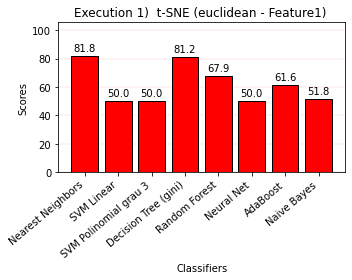

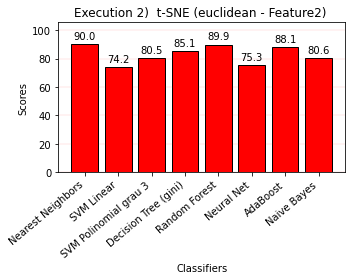

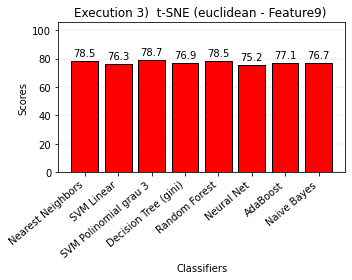

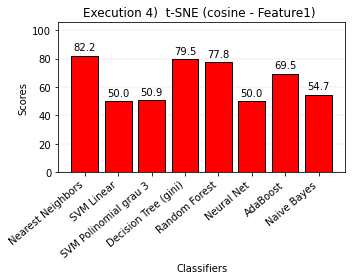

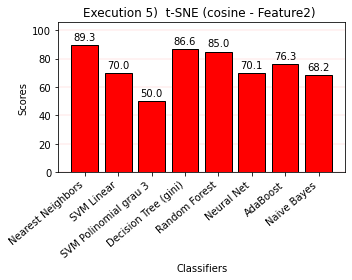

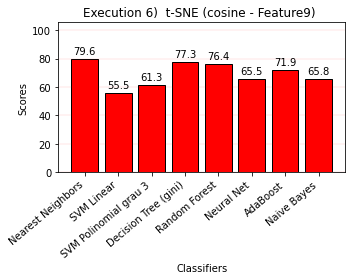

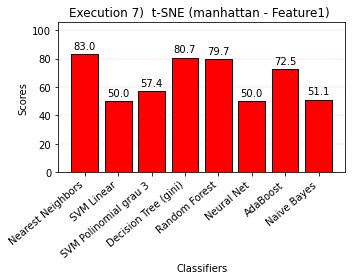

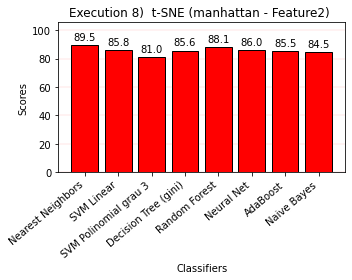

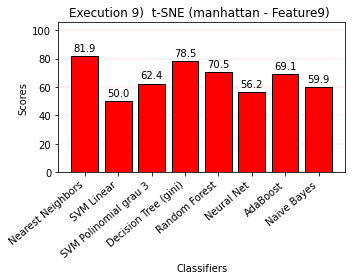

In [10]:
#Obtendo os scores dos classificadores
for idx, descriptor in enumerate(tsne_coord.keys()):
  classifiers = tsne_results[idx].keys()
  scores = [round(tsne_results[idx][i], 1) for i in classifiers]
  #print(descriptor, scores)
  further_info = " t-SNE (" + descriptor + ") "
  bar_chart(classifiers, scores, 'Execution ' + str(idx+1) + ') ', 'Classifiers', 'Scores', (5,4), further_info)